# 오전 수업

# ** 지수 이동 평균

### - DataFrame.ewm (span = 가중치를 부여할 데이터 개수).mean()

#### 알파 = 1 / span
#### 최근 데이터 + (1-알파)이전 데이터 + (1-알파)제곱* 그 이전 데이터

### - 최근의 데이터 반영 비율을 높이고 이전 데이터의 반영 비율을 줄여서 계산 하는 방식

In [36]:
import numpy as np
import pandas as pd

# 2020년 1월 1일부터 월 단위로 5개의 데이터를 생성
timeindex = pd.date_range('01/01/2020', periods = 5, freq = 'M')

df = pd.DataFrame(index = timeindex)

df["price"] = [10, 20, 30, 40, 50]

print(df)

            price
2020-01-31     10
2020-02-29     20
2020-03-31     30
2020-04-30     40
2020-05-31     50


In [37]:
# span을 2로 설정해서 지수이동평균 구하기
print(df.ewm(span=2).mean())

                price
2020-01-31  10.000000
2020-02-29  17.500000
2020-03-31  26.153846
2020-04-30  35.500000
2020-05-31  45.206612


### - 주가 데이터에 많이 사용
### - 주가는 최근 데이터의 추세를 반영하는 것이 예측의 정확성을 높여주기 때문

# ** 시계열 데이터에서의 누락된 값

### - 시간의 간격이 일정한 상태에서 데이터가 누락된 경우라면 제거하는 것보다 패턴을 확인해서 데이터를 대입해놓는 것이 좋음

#### 2019-01-01: 100
#### 2019-02-01: 200
#### 2019-03-01: None
#### 2019-04-01: 400

### - DataFrame의 interpolate 함수를 호출하면 누락된 값을 채워줌
#### > 매개변수가 없으면 선형으로 관계를 파악해서 채워주고 method에 quardratic을 설정 시 비선형으로 채워줌

#### aX + b
#### : 일차 방정식
#### - 데이터의 분포가 직선에 가까워짐

#### aX**2 + bX + c
#### : 이차 방정식
#### - 데이터의 분포가 곡선에 가까워짐

#### > 머신러닝을 할 때도 회귀나 분류하기 전에 데이터의 분포를 확인해야 함
#### > 데이터의 분포를 확인할 때는 산포도(scatter)를 많이 이용

In [4]:
# 선형으로 누락된 값 채우기
# 2020년 1월 1일부터 월 단위로 5개의 데이터를 생성
timeindex = pd.date_range('01/01/2020', periods = 12, freq = 'M')

df = pd.DataFrame(index = timeindex)

# 누락된 데이터(결측치 - None, null, np.NaN) 만들기
df["price"] = [10, 20, np.NaN, 40, 50, 60, 70, 80, 90, np.NaN, 110, 120]

print(df.interpolate())

            price
2020-01-31   10.0
2020-02-29   20.0
2020-03-31   30.0
2020-04-30   40.0
2020-05-31   50.0
2020-06-30   60.0
2020-07-31   70.0
2020-08-31   80.0
2020-09-30   90.0
2020-10-31  100.0
2020-11-30  110.0
2020-12-31  120.0


In [7]:
# 비선형으로 누락된 값 채우기
# 2020년 1월 1일부터 월 단위로 5개의 데이터를 생성
timeindex = pd.date_range('01/01/2020', periods = 12, freq = 'M')

df = pd.DataFrame(index = timeindex)

# 누락된 데이터(결측치 - None, null, np.NaN) 만들기
df["price"] = [100, 400, np.NaN, 1600, 2500, 3600, 4900, 6400, 8100, np.NaN, 12100, 14400]

print(df.interpolate(method = 'quadratic'))
print(df.interpolate(method = 'linear'))

                   price
2020-01-31    100.000000
2020-02-29    400.000000
2020-03-31    915.994832
2020-04-30   1600.000000
2020-05-31   2500.000000
2020-06-30   3600.000000
2020-07-31   4900.000000
2020-08-31   6400.000000
2020-09-30   8100.000000
2020-10-31  10045.819905
2020-11-30  12100.000000
2020-12-31  14400.000000
              price
2020-01-31    100.0
2020-02-29    400.0
2020-03-31   1000.0
2020-04-30   1600.0
2020-05-31   2500.0
2020-06-30   3600.0
2020-07-31   4900.0
2020-08-31   6400.0
2020-09-30   8100.0
2020-10-31  10100.0
2020-11-30  12100.0
2020-12-31  14400.0


# ** Pandas의 함수 매핑

### - pandas에서는 Series나 DataFrame의 개별 요소에 동일한 함수를 적용하고자 하는 경우 apply 메소드 이용


## 1. Series가 apply 메소드 호출 시 각 요소에 함수를 적용한 후 그 결과를 가지고 다시 Series를 만들어 리턴


## 2. DataFrame에 적용하면 적용방법에 따라 Series가 되거나 DataFrame이 리턴되기도 함
#### > axis 옵션을 이용하여 열과 행 단위로 데이터 대입 가능
#### > axis = 0 이 기본값으로 열단위로 대입, 1 설정 시 행단위로 함수에 대입

### - Series는 하나의 열의 개념이고 DataFrame은 행열(Matrix - Table)
### - 머신러닝에서는 데이터의 단위가 대부분 Matrix임

#### DataFrame['컬럼이름']
#### : Series

#### DataFrame[['컬럼이름']]
#### : DataFrame

#### > pandas 자료구조에서 .values 할 시 컬럼이름을 제거하고 데이터만으로 구성된 numpy.ndarray 리턴

### - 머신러닝에서는 컬럼이름 불필요

In [8]:
# seaborn 패키지에 존재하는 titanic 데이터 가져오기
# 인터넷에서 가져오기 때문에 인터넷 연결 필수
# seaborn 패키지: 샘플 데이터 셋과 matplotlib보다 시각적인 효과가 뛰어난 그래프를 만들어주는 패키지
# numpy, pandas, matplotlib, seaborn, sklearn (전처리, 머신러닝)
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [9]:
# 2개의 컬럼을 추출해서 새로운 DataFrame 만들기
# age, fare
df = titanic[['age', 'fare']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
age     714 non-null float64
fare    891 non-null float64
dtypes: float64(2)
memory usage: 14.0 KB


In [14]:
# 행 전체의 age와 fare 열 가져오기
df = titanic.loc[:, ['age', 'fare']]
df.info()
# 결과는 같음
print()

#df = titanic.loc[1:10, ['age', 'fare']]
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
age     714 non-null float64
fare    891 non-null float64
dtypes: float64(2)
memory usage: 14.0 KB



In [17]:
def add_10(x) :
    return x + 10

# 데이터 프레임에 함수 적용 - 열단위로 적용
result = df.apply(add_10)
print(result.head())
result.info()

print()

# 행단위 적용
result = df.apply(add_10, axis = 1)
print(result.head())
result.info()

    age     fare
0  32.0  17.2500
1  48.0  81.2833
2  36.0  17.9250
3  45.0  63.1000
4  45.0  18.0500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
age     714 non-null float64
fare    891 non-null float64
dtypes: float64(2)
memory usage: 14.0 KB

    age     fare
0  32.0  17.2500
1  48.0  81.2833
2  36.0  17.9250
3  45.0  63.1000
4  45.0  18.0500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
age     714 non-null float64
fare    891 non-null float64
dtypes: float64(2)
memory usage: 14.0 KB


# ** DataFrame 결합


## 1. merge()

### - 2개의 DataFrame이나 Series를 합치기 위한 함수
### - 첫번째와 두번째 매개변수는 합치기 위한 Series나 DataFrame을 설정해야 하는데 left와 right 매개변수로 대입해도 됨
### - 하나 이상의 key를 가지고 결합
### - 관계형 데이터베이스의 join과 유사
### - 별다른 설정이 없으면 동일한 컬럼이름을 찾아서 join
### - 직접 join key를 지정하고자 하면 on 매개변수에 컬럼이름을 설정
### - 양쪽의 key 이름이 다른 경우 left_on 그리고  rignt_on 매개변수를 이용하여 직접 key 설정

In [4]:
import os
print(os.getcwd())

C:\Users\admin


In [6]:
# stock price.xlsx 파일과 stock valuation.xlsx 파일 읽기
#import numpy as np
#import pandas as pd

price = pd.read_excel('./data/stock price.xlsx')
valuation = pd.read_excel('./data/stock valuation.xlsx')
price.info(); print()
valuation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
id            10 non-null int64
stock_name    10 non-null object
value         10 non-null float64
price         10 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
id      10 non-null int64
name    10 non-null object
eps     10 non-null float64
bps     10 non-null int64
per     10 non-null float64
pbr     10 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 608.0+ bytes


In [9]:
# 2개의 DataFrame을 id 기준으로 합치기
# 양쪽 모두에 존재하는 데이터만 조인에 참여 - InnerJoin
merge_inner = pd.merge(price, valuation)
print(merge_inner); print()
merge_inner.info()

       id stock_name          value   price    name           eps     bps  \
0  130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068   
1  139480        이마트  239230.833333  254500     이마트  18268.166667  295780   
2  145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090   
3  185750        종근당   40293.666667  100500     종근당   3990.333333   40684   
4  204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335   

         per       pbr  
0  15.695091  1.829178  
1  13.931338  0.860437  
2  14.283226  0.758627  
3  25.185866  2.470259  
4  40.802348  0.651359  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 9 columns):
id            5 non-null int64
stock_name    5 non-null object
value         5 non-null float64
price         5 non-null int64
name          5 non-null object
eps           5 non-null float64
bps           5 non-null int64
per           5 non-null float64
pbr           5 non-null float

### - 기본 merge는 join의 개념
### - 어느 한쪽에만 존재하는 데이터를 merge에 참여시킬 때는 how라는 매개변수에 left, right, outer 중 하나 설정함
#### > 이러한 join 방식을 Outer join이라 함

### - key가 아닌 컬럼 중 양쪽에 동일한 이름으로 존재하는 컬럼이 있을 시 _x와 _y라는 이름이 자동삽입
### - 변경 원할 시 suffixes 옵션에 tuple로 추가될 이름 2개를 설정

### - 양쪽에 동일한 의미를 갖는 컬럼이 없는 경우 index를 이용해서 join 가능
### - 이 경우 left_index = True, right_index = True 추가

### - merge를 수행하면 key 값으로 정렬을 수행하나 sort 옵션에 false 설정 시 정렬 비수행

In [10]:
# 어느 한쪽에만 존재하는 데이터도 join에 참여 - outer join
merge_outer = pd.merge(price, valuation, how = 'outer', on = 'id')
print(merge_outer)

        id stock_name          value     price       name           eps  \
0   128940       한미약품   59385.666667  421000.0        NaN           NaN   
1   130960     CJ E&M   58540.666667   98900.0     CJ E&M   6301.333333   
2   138250      엔에스쇼핑   14558.666667   13200.0        NaN           NaN   
3   139480        이마트  239230.833333  254500.0        이마트  18268.166667   
4   142280     녹십자엠에스     468.833333   10200.0        NaN           NaN   
5   145990        삼양사   82750.000000   82000.0        삼양사   5741.000000   
6   185750        종근당   40293.666667  100500.0        종근당   3990.333333   
7   192400      쿠쿠홀딩스  179204.666667  177500.0        NaN           NaN   
8   199800         툴젠   -2514.333333  115400.0        NaN           NaN   
9   204210     모두투어리츠    3093.333333    3475.0     모두투어리츠     85.166667   
10  136480        NaN            NaN       NaN         하림    274.166667   
11  138040        NaN            NaN       NaN    메리츠금융지주   2122.333333   
12  161390        NaN    

## 2. join
### : 인덱스를 기준으로 합쳐주는 함수
#### DataFrame.join(다른 데이터 프레임)

In [13]:
# 파일의 내용을 읽을 때 하나의 컬럼을 인덱스로 설정
price = pd.read_excel('./data/stock price.xlsx', index_col = 'id')
valuation = pd.read_excel('./data/stock valuation.xlsx', index_col = 'id')
price.info(); print()
valuation.info(); print()
print(price.head()); print()
print(valuation.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 128940 to 204210
Data columns (total 3 columns):
stock_name    10 non-null object
value         10 non-null float64
price         10 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 320.0+ bytes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 130960 to 207940
Data columns (total 5 columns):
name    10 non-null object
eps     10 non-null float64
bps     10 non-null int64
per     10 non-null float64
pbr     10 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 480.0+ bytes

       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200

           name           eps     bps        per       pbr
id                                                        


In [14]:
# index를 이용하여 join
# price의 모든 데이터는 join에 참여
# valuation에서는 참여하지 않는 데이터가 있을 수 있음(없는 index)
stock_join = price.join(valuation)
print(stock_join)

       stock_name          value   price    name           eps       bps  \
id                                                                         
128940       한미약품   59385.666667  421000     NaN           NaN       NaN   
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068.0   
138250      엔에스쇼핑   14558.666667   13200     NaN           NaN       NaN   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780.0   
142280     녹십자엠에스     468.833333   10200     NaN           NaN       NaN   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090.0   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684.0   
192400      쿠쿠홀딩스  179204.666667  177500     NaN           NaN       NaN   
199800         툴젠   -2514.333333  115400     NaN           NaN       NaN   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335.0   

              per       pbr  
id                           
128940        NaN       NaN

## 3. concat
### : 구성 형태와 속성이 균일한 경우 행 또는 열 방향으로 이어 붙이는 함수
### - merge나 join은 행 방향으로 결합
### - join 옵션에 inner를 적용하면 양쪽에 모두 존재하는 데이터끼리 결합, 
### - join 옵션에 outer를 설정 시 한 쪽에만 존재하는 데이터도 결합, (기본값은 outer)
### - axis 옵션에 0 설정 시 열 방향 결합, 1 설정 시 행 방향 결합

In [18]:
# concat - 열, 행 방향으로 DataFrame을 합쳐주는 함수
df1 = pd.DataFrame({'a':['a0', 'a1', 'a2']}, index = [1, 2, 3])
df2 = pd.DataFrame({'a':['a2', 'a3', 'a4']
                    , 'b':['b2', 'b3', 'b4']}, index = [2, 3, 4])
print(df1)
print(df2)

    a
1  a0
2  a1
3  a2
    a   b
2  a2  b2
3  a3  b3
4  a4  b4


In [19]:
# 위 아래로 합치기
print(pd.concat([df1, df2]))

    a    b
1  a0  NaN
2  a1  NaN
3  a2  NaN
2  a2   b2
3  a3   b3
4  a4   b4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [20]:
# 좌우로 합치기
print(pd.concat([df1, df2], axis = 1))

     a    a    b
1   a0  NaN  NaN
2   a1   a2   b2
3   a2   a3   b3
4  NaN   a4   b4


In [21]:
# 한쪽에만 존재하는 데이터 찾기
print(pd.concat([df1, df2], axis = 1, join = 'inner'))

    a   a   b
2  a1  a2  b2
3  a2  a3  b3


## 4. append
### : 인덱스가 별의미가 없는 경우 무조건 행방으로 합치는 함수

## 5. combine_first
### : 양쪽에 겹쳐지는 인덱스가 존재하는 경우 무조건 호출하는 쪽의 값으로 설정

In [22]:
# 행 방향으로 무조건 합치기
print(df1.append(df2))

    a    b
1  a0  NaN
2  a1  NaN
3  a2  NaN
2  a2   b2
3  a3   b3
4  a4   b4


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [23]:
# 인덱스를 가지고 합침 + 호출하는 쪽의 데이터 우선 적용
print(df1.combine_first(df2))

    a    b
1  a0  NaN
2  a1   b2
3  a2   b3
4  a4   b4


# ** 그룹화
### - DataFrame의 내용을 그룹 단위로 분할해서 탐색하는 것
### - 그룹화한 후 집계, 변환, 필터링 적용
### - 분할에는 groupby 함수 이용
### - 변환에는 apply 함수 이용


## 1. goupby 함수
### : 그룹화할 컬럼이름 대입 시 그룹화 수행
### - 컬럼 이름은 1개도 되며 컬럼 이름의 list도 가능
### - 그룹별 데이터를 별도로 가져오고자 하는 경우 get_group(그룹이름)

In [27]:
import seaborn as sns

# titanic 데이터 가져오기
titanic = sns.load_dataset('titanic')
#print(titanic.head()); print()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [29]:
# class 별로 그룹화
grouped = titanic.groupby('class')
print(grouped) #<pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002E73D360208>

### - 빠른 열거 이용하여 그룹화 시 사용한 키와 데이터를 튜플로 접근 가능
#### > 파이썬은 튜플을 나누어 접근 가능

In [35]:
for key, data in grouped :
    print(key)
    print(data.head(2)); print()

First
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1         1       1  female  38.0      1      0  71.2833        C  First   
3         1       1  female  35.0      1      0  53.1000        S  First   

     who  adult_male deck  embark_town alive  alone  
1  woman       False    C    Cherbourg   yes  False  
3  woman       False    C  Southampton   yes  False  

Second
    survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
9          1       2  female  14.0      1      0  30.0708        C  Second   
15         1       2  female  55.0      0      0  16.0000        S  Second   

      who  adult_male deck  embark_town alive  alone  
9   child       False  NaN    Cherbourg   yes  False  
15  woman       False  NaN  Southampton   yes   True  

Third
   survived  pclass     sex   age  sibsp  parch   fare embarked  class    who  \
0         0       3    male  22.0      1      0  7.250        S  Third    man   
2         1       3  femal

In [39]:
# Third에 해당하는 그룹의 데이터만 가져오기
third = grouped.get_group('Third')
print(third['class'])

0      Third
2      Third
4      Third
5      Third
7      Third
       ...  
882    Third
884    Third
885    Third
888    Third
890    Third
Name: class, Length: 491, dtype: category
Categories (3, object): [First, Second, Third]


### - 집계합수 사용 가능
#### > (개수, 합계, 평균, 최댓값, 최솟값, 표준편차, 분산, 중간값, 사분위수)

In [40]:
# 집계함수 적용
print(grouped.mean())

# 머신러닝보다 통계분석할 때 사용

        survived  pclass        age     sibsp     parch       fare  \
class                                                                
First   0.629630     1.0  38.233441  0.416667  0.356481  84.154687   
Second  0.472826     2.0  29.877630  0.402174  0.380435  20.662183   
Third   0.242363     3.0  25.140620  0.615071  0.393075  13.675550   

        adult_male     alone  
class                         
First     0.550926  0.504630  
Second    0.538043  0.565217  
Third     0.649695  0.659878  


In [41]:
# 2개의 특성으로 그룹화해서 집계
grouped = titanic.groupby(['class', 'sex']) # [대괄호] 안에는 숫자형이 아닌 범주형 데이터 삽입해야 함
print(grouped.mean())

               survived  pclass        age     sibsp     parch        fare  \
class  sex                                                                   
First  female  0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       male    0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
Second female  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       male    0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
Third  female  0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
       male    0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
class  sex                           
First  female    0.000000  0.361702  
       male      0.975410  0.614754  
Second female    0.000000  0.421053  
       male      0.916667  0.666667  
Third  female    0.000000  0.416667  
       male      0.919308  0.760807  


### - mean(), max(), min(), sum(), count(), size(), var(), std(), first(), last(), describe(), info() 등

### - apply() 호출하여 변환 가능
#### > 매개변수 1개를 받아서 return하는 함수를 대입

### - fiter() 호출하여 원하는 데이터만 추출 가능
#### > 매개변수 1개를 받아 bool을 리턴하는 함수를 대입

### - agg() 이용하여 직접 만든 함수를 대입한 결과를 리턴
#### > agg 함수에는 함수의 list 대입 가능

In [42]:
# 그룹화해서 원하는 함수를 적용
def func(x):
    return x.max() - x.min()

grouped = titanic.groupby(['class'])
print(grouped.agg(func))

        survived  pclass    age  sibsp  parch      fare
class                                                  
First          1       0  79.08      3      4  512.3292
Second         1       0  69.33      3      3   73.5000
Third          1       0  73.58      8      6   69.5500


In [43]:
# 여러 개의 함수를 적용
print(grouped.agg(['max', 'min']))

       survived     pclass       sex           age       sibsp      ...  \
            max min    max min   max     min   max   min   max min  ...   
class                                                               ...   
First         1   0      1   1  male  female  80.0  0.92     3   0  ...   
Second        1   0      2   2  male  female  70.0  0.67     3   0  ...   
Third         1   0      3   3  male  female  74.0  0.42     8   0  ...   

            fare         who        adult_male        alive     alone         
             max  min    max    min        max    min   max min   max    min  
class                                                                         
First   512.3292  0.0  woman  child       True  False   yes  no  True  False  
Second   73.5000  0.0  woman  child       True  False   yes  no  True  False  
Third    69.5500  0.0  woman  child       True  False   yes  no  True  False  

[3 rows x 22 columns]


In [55]:
# 각 그룹별 데이터 개수 확인
for key, data in grouped:
    print(key, len(data))
    
print()
    
# 데이터가 200개가 안 되는 그룹 제거

# 데이터의 개수가 200이상인 여부를 알려주는 함수 작성
def over200(x):
    return len(x) >= 200

grouped_filter = grouped.filter(over200)
print('< 데이터의 개수가 200이상 >')
print(grouped_filter) ; print()
print(grouped_filter['class'])

First 216
Second 184
Third 491

< 데이터의 개수가 200이상 >
     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0           0       3    male  22.0      1      0   7.2500        S  Third   
1           1       1  female  38.0      1      0  71.2833        C  First   
2           1       3  female  26.0      0      0   7.9250        S  Third   
3           1       1  female  35.0      1      0  53.1000        S  First   
4           0       3    male  35.0      0      0   8.0500        S  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
887         1       1  female  19.0      0      0  30.0000        S  First   
888         0       3  female   NaN      1      2  23.4500        S  Third   
889         1       1    male  26.0      0      0  30.0000        C  First   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  

In [56]:
# 위의 내용을 람다함수로 변환
# 파이썬에서의 람다는 이름없는 한 줄짜리 함수
grouped_filter = grouped.filter(lambda x:len(x) > 200)
print(grouped_filter) ; print()
print(grouped_filter['class'])

     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0           0       3    male  22.0      1      0   7.2500        S  Third   
1           1       1  female  38.0      1      0  71.2833        C  First   
2           1       3  female  26.0      0      0   7.9250        S  Third   
3           1       1  female  35.0      1      0  53.1000        S  First   
4           0       3    male  35.0      0      0   8.0500        S  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
887         1       1  female  19.0      0      0  30.0000        S  First   
888         0       3  female   NaN      1      2  23.4500        S  Third   
889         1       1    male  26.0      0      0  30.0000        C  First   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  adult_male deck  embark_town alive  alone  
0      

In [61]:
# age 열의 평균이 30이 안 되는 그룹 제거

# age 평균
for key, data in grouped:
    print(key, data['age'].mean())

print()

grouped_filter = grouped.filter(lambda x:x['age'].mean() >= 30)
print(grouped_filter) ; print()
print(grouped_filter['class'])

First 38.233440860215055
Second 29.87763005780347
Third 25.14061971830986

     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1           1       1  female  38.0      1      0  71.2833        C  First   
3           1       1  female  35.0      1      0  53.1000        S  First   
6           0       1    male  54.0      0      0  51.8625        S  First   
11          1       1  female  58.0      0      0  26.5500        S  First   
23          1       1    male  28.0      0      0  35.5000        S  First   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
871         1       1  female  47.0      1      1  52.5542        S  First   
872         0       1    male  33.0      0      0   5.0000        S  First   
879         1       1  female  56.0      0      1  83.1583        C  First   
887         1       1  female  19.0      0      0  30.0000        S  First   
889         1       1    male  26.0      0      0  30.0000        C

## 2. 멀티 인덱스
### - 인덱스를 여러 그룹으로 설정한 것
### - 멀티 인덱스로 설정된 데이터 모임에서 특정한 인덱스의 데이터를 가져오고자 하면 loc
####  [(첫번째 인덱스값, 두번째 인덱스 값, ...)]

### - xs 라는 함수를 이용할 수 있으며 이 경우 첫번째 매개변수로 인덱스 이름을 대입하고 level에 인덱스의 값 대입 

In [66]:
# 그룹화할 때 2개 이상의 컬럼 이름을 대입하면 멀티인덱스
grouped = titanic.groupby(['class', 'sex'])
gdf = grouped.mean()
print(gdf)


# 행 단위로 데이터 접근
print(); print("< 행 단위로 데이터 접근 >")
print(gdf.loc['Third'])

print(); print("< Third의 male 만 데이터 접근 >")
print(gdf.loc['Third', 'male'])

               survived  pclass        age     sibsp     parch        fare  \
class  sex                                                                   
First  female  0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       male    0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
Second female  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       male    0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
Third  female  0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
       male    0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
class  sex                           
First  female    0.000000  0.361702  
       male      0.975410  0.614754  
Second female    0.000000  0.421053  
       male      0.916667  0.666667  
Third  female    0.000000  0.416667  
       male      0.919308  0.760807  

< 행 단위로 데이터 접근 >
        survived  pclass        age     sibsp     par

In [67]:
# xs 인덱스 사용
print(gdf.xs('male', level = 'sex'))

        survived  pclass        age     sibsp     parch       fare  \
class                                                                
First   0.368852     1.0  41.281386  0.311475  0.278689  67.226127   
Second  0.157407     2.0  30.740707  0.342593  0.222222  19.741782   
Third   0.135447     3.0  26.507589  0.498559  0.224784  12.661633   

        adult_male     alone  
class                         
First     0.975410  0.614754  
Second    0.916667  0.666667  
Third     0.919308  0.760807  


# 오후 수업

## 3. pivot_table()
### - 데이터를 그룹화하기 위한 함수
### - 데이터를 행과 열 단위로 그룹화하여 기술 통계 값을 출력해주는 함수
#### pandas.pivot_table(데이터프레임, values = [연산을 수행할 컬럼이름 나열], index = [index로 사용할 컬럼이름 나열, columns = [컬럼으로 사용할 이름 나열], mragins = [전체 데이터 출력 여부], argfunc = 수행할 함수, fill_value = NA인 경우의 대체값)
### - pivot_table 함수 호출 시 인덱스는 대부분 멀티 인덱스로 생성됨
#### > 해제 원할 시 reset_index 호출

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns

# seaborn에 존재하는 titanic 데이터 가져오기
titanic = sns.load_dataset('titanic')
print(titanic.head()); print()
titanic.info()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age       

In [74]:
# age, sex, class, fare, survived 컬럼만 추출
# 새로운 데이터프레임 생성

print("< 첫번째 방법 >")
df = titanic[['age', 'sex', 'class', 'fare', 'survived']]
print(df) ; print()

print("< 두번째 방법 >")
df = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]
print(df) ; print()

< 첫번째 방법 >
      age     sex   class     fare  survived
0    22.0    male   Third   7.2500         0
1    38.0  female   First  71.2833         1
2    26.0  female   Third   7.9250         1
3    35.0  female   First  53.1000         1
4    35.0    male   Third   8.0500         0
..    ...     ...     ...      ...       ...
886  27.0    male  Second  13.0000         0
887  19.0  female   First  30.0000         1
888   NaN  female   Third  23.4500         0
889  26.0    male   First  30.0000         1
890  32.0    male   Third   7.7500         0

[891 rows x 5 columns]

< 두번째 방법 >
      age     sex   class     fare  survived
0    22.0    male   Third   7.2500         0
1    38.0  female   First  71.2833         1
2    26.0  female   Third   7.9250         1
3    35.0  female   First  53.1000         1
4    35.0    male   Third   8.0500         0
..    ...     ...     ...      ...       ...
886  27.0    male  Second  13.0000         0
887  19.0  female   First  30.0000         1
888   Na

In [81]:
# class 별로 성별을 구분해서 age의 평균 구하기
pivot1 = pd.pivot_table(df
                        , index = ['class']
                        , columns = ['sex']
                        , values = ['age']
                        , aggfunc = 'mean')
print("< class 별로 성별을 구분해서 age의 평균 구하기 >")
print(pivot1) ; print()

# class 별로 성별을 구분해서 age의 평균과 합계 구하기
pivot1 = pd.pivot_table(df
                        , index = ['class']
                        , columns = ['sex']
                        , values = ['age']
                        , aggfunc = ['mean', 'sum'])
print("< class 별로 성별을 구분해서 age의 평균과 합계 구하기 >")
print(pivot1) ; print()

< class 별로 성별을 구분해서 age의 평균 구하기 >
              age           
sex        female       male
class                       
First   34.611765  41.281386
Second  28.722973  30.740707
Third   21.750000  26.507589

< class 별로 성별을 구분해서 age의 평균과 합계 구하기 >
             mean                sum         
              age                age         
sex        female       male  female     male
class                                        
First   34.611765  41.281386  2942.0  4169.42
Second  28.722973  30.740707  2125.5  3043.33
Third   21.750000  26.507589  2218.5  6706.42



In [96]:
# 인덱스로 class와 sex를 설정
# 열은 survived
# 데이터는 age, fare
# 집계함수는 mean과 sum 적용
pivot1 = pd.pivot_table(df
                        , index = ['class', 'sex']
                        , columns = ['survived']
                        , values = ['age', 'fare']
                        , aggfunc = ['mean', 'sum'])
print("< class와 성별로 생존자를 구분해서 age와 fare의 평균과 합계 구하기 >")
print(pivot1) ; print()

# First인 데이터만 골라보기
# 첫번째 인덱스(class)가 First인 데이터 가져오기
print("< 첫번째 인덱스(class)가 First인 데이터 가져오기 >")
print(pivot1.xs('First')) ; print()

# class가 First이면서 성별이 male인 데이터만 골라보기
print("< class가 First이면서 성별이 male인 데이터만 골라보기 >")
print(pivot1.xs(('First', 'male'), level = ['class', 'sex'])) ; print()

# mean 열의 데이터만 가져오기
print("< mean 열의 데이터만 가져오기 >")
print(pivot1.xs('mean', axis = 1))
pivot1.xs('mean', axis = 1)


< class와 성별로 생존자를 구분해서 age와 fare의 평균과 합계 구하기 >
                    mean                                        sum           \
                     age                   fare                 age            
survived               0          1           0           1       0        1   
class  sex                                                                     
First  female  25.666667  34.939024  110.604167  105.978159    77.0  2865.00   
       male    44.581967  36.248000   62.894910   74.637320  2719.5  1449.92   
Second female  36.000000  28.080882   18.250000   22.288989   216.0  1909.50   
       male    33.369048  16.022000   19.488965   21.095100  2803.0   240.33   
Third  female  23.818182  19.329787   19.773093   12.464526  1310.0   908.50   
       male    27.255814  22.274211   12.204469   15.579696  5860.0   846.42   

                                     
                    fare             
survived               0          1  
class  sex                           


age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696

# ** 서울시 구별 CCTV 개수와 인구수를 시각화


## 1. 데이터 가져오기

### 1) data.seoul.go.kr 사이트에서 서울시와 관련된 데이터를 가져오기
### - cctv 개수 => cctv.xlsx
### - 인구 데이터 => pop.txt


## 2. python에서 파일 두 개를 읽고 데이터프레임 만들기

In [118]:
'''
서울시 구별 CCTV와 인구수 시각화

'''
import pandas as pd

# 1. cctv.xlsx 파일과 pop.txt 파일의 내용 읽기
cctv = pd. read_excel('./data/cctv.xlsx')
print(cctv.head()) ; print()
cctv.info() ; print()

pop = pd.read_csv('./data/pop.txt'
                  , skiprows = 2
                  , delimiter = '\t'
                  , thousands = ',')
# txt 파일 불러올 때는 미리 열어보고 데이터가 어떻게 구성되어있는지 꼭 확인
print(pop.head()) ; print()
pop.info() ; print()

     기관명    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0  강 남 구  5221    1944.0  195.0  316.0    430    546    765    577    448
1  강 동 구  1879     303.0  387.0  134.0     59    144    194    273    385
2  강 북 구  1265     243.0   88.0  141.0     74    145    254      1    319
3  강 서 구  1617     219.0  155.0  118.0    230    187    190    264    254
4  관 악 구  3985     430.0   56.0  419.0    487    609    619    694    671

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
기관명         25 non-null object
소계          25 non-null int64
2011년 이전    23 non-null float64
2012년       23 non-null float64
2013년       23 non-null float64
2014년       25 non-null int64
2015년       25 non-null int64
2016년       25 non-null int64
2017년       25 non-null int64
2018년       25 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB

     기간  자치구       세대         계       남자       여자      계.1     남자.1     여자.1  \
0 

## 3. 컬럼이름 수정하고 구 이름을 동일한 형태로 만들기

In [119]:
# 컬럼이름 수정하고 구 이름을 동일한 형태로 만들기
# inplace는 트루가 설정되면 현재 데이터 프레임에 적용하고
# inplace 옵션이 없다면 현재 데이터 프레임을 복사해서 작업하고 return해줌
cctv.rename(columns = {cctv.columns[0] : '구별'}
            , inplace = True)
pop.rename(columns = {pop.columns[1] : '구별'}
            , inplace = True)

# cctv 의 구별데이터에서 공백 전부 제거
gu = []
for x in cctv['구별'] :
    gu.append(x.replace(' ', ''))

cctv['구별'] = gu

print(cctv['구별'])

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: 구별, dtype: object


## 4. 불필요한 컬럼이나 열을 제거

### - 컬럼이나 열을 제거하는 방법은 두 가지

### - 현재 데이터프레임에서 직접 제거
#### > drop 함수 이용

### - 필요한 컬럼이나 열만 추출

In [120]:
# pop에서 필요한 행과 열만 가져오기
# pop에서 기간, 구별, 계, 남자, 여자 열만 추출
pop = pop[['기간', '구별', '계', '남자', '여자']]

# 0번 행을 제거
pop.drop([0], inplace = True)

# 새로운 컬럼 추가 - 여성비율 = 여자/계 * 100
pop['여성비율'] = pop['여자']/pop['계'] * 100
print(pop)

      기간    구별       계      남자      여자       여성비율
1   2019   종로구  161869   78215   83654  51.680062
2   2019    중구  136488   66823   69665  51.041117
3   2019   용산구  245185  119599  125586  51.220915
4   2019   성동구  308979  150861  158118  51.174352
5   2019   광진구  366972  176917  190055  51.790055
6   2019  동대문구  363023  178490  184533  50.832316
7   2019   중랑구  402024  199006  203018  50.498975
8   2019   성북구  454744  219099  235645  51.819265
9   2019   강북구  317695  154638  163057  51.325013
10  2019   도봉구  335631  163961  171670  51.148434
11  2019   노원구  537303  259810  277493  51.645533
12  2019   은평구  484546  233360  251186  51.839454
13  2019  서대문구  323171  153215  169956  52.590115
14  2019   마포구  385925  181303  204622  53.021183
15  2019   양천구  462285  227019  235266  50.891982
16  2019   강서구  598273  289691  308582  51.578794
17  2019   구로구  439371  219602  219769  50.019004
18  2019   금천구  251820  128954  122866  48.791200
19  2019  영등포구  400986  200986  200000  49.877053


## 5. 두 개의 데이터프레임 합치기

In [121]:
# cctv와 pop 합치기 - 기준은 '구별'
df = pd.merge(cctv, pop, on = '구별')
print(df)

      구별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년  \
0    강남구  5221    1944.0  195.0  316.0    430    546    765    577    448   
1    강동구  1879     303.0  387.0  134.0     59    144    194    273    385   
2    강북구  1265     243.0   88.0  141.0     74    145    254      1    319   
3    강서구  1617     219.0  155.0  118.0    230    187    190    264    254   
4    관악구  3985     430.0   56.0  419.0    487    609    619    694    671   
5    광진구  1581     470.0   42.0   83.0     87     64     21    468    346   
6    구로구  3227     852.0  219.0  349.0    187    268    326    540    486   
7    금천구  1634      27.0   17.0  242.0    101    382    136    199    530   
8    노원구  1906     481.0  117.0  203.0     80    461    298    110    156   
9    도봉구   858     197.0   66.0    8.0    185     59    155    117     71   
10  동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197   
11   동작구  1780     238.0   93.0   29.0    503    130    254    278    255   

## 6. 합쳐진 데이터프레임에서 불필요한 컬럼 제거
#### 2011년 이전, 2012년, 2013년, 2014년, 2015년, 2016년, 2017년, 기간
#### 2018년 남겨짐

In [122]:
# 합쳐진 데이터프레임에서 불필요한 컬럼 제거
# 2011년 이전, 2012년, 2013년, 2014년, 2015년, 2016년, 2017년. 기간
df.drop(['2011년 이전'
         , '2012년'
         , '2013년'
         , '2014년'
         , '2015년'
         , '2016년'
         , '2017년'
         , '기간']
        , axis = 1, inplace = True)
print(df)

      구별    소계  2018년       계      남자      여자       여성비율
0    강남구  5221    448  550209  263345  286864  52.137279
1    강동구  1879    385  440390  217338  223052  50.648743
2    강북구  1265    319  317695  154638  163057  51.325013
3    강서구  1617    254  598273  289691  308582  51.578794
4    관악구  3985    671  517334  259194  258140  49.898132
5    광진구  1581    346  366972  176917  190055  51.790055
6    구로구  3227    486  439371  219602  219769  50.019004
7    금천구  1634    530  251820  128954  122866  48.791200
8    노원구  1906    156  537303  259810  277493  51.645533
9    도봉구   858     71  335631  163961  171670  51.148434
10  동대문구  2003    197  363023  178490  184533  50.832316
11   동작구  1780    255  408912  197706  211206  51.650722
12   마포구  1935    195  385925  181303  204622  53.021183
13  서대문구  2121    194  323171  153215  169956  52.590115
14   서초구  2835    396  435107  208181  226926  52.154068
15   성동구  2679    294  308979  150861  158118  51.174352
16   성북구  3003    643  454744  

## 7. 구별 컬럼을 인덱스로 설정

In [123]:
# 구별 컬럼을 인덱스로 설정
df.set_index('구별', inplace = True)
print(df)

        소계  2018년       계      남자      여자       여성비율
구별                                                  
강남구   5221    448  550209  263345  286864  52.137279
강동구   1879    385  440390  217338  223052  50.648743
강북구   1265    319  317695  154638  163057  51.325013
강서구   1617    254  598273  289691  308582  51.578794
관악구   3985    671  517334  259194  258140  49.898132
광진구   1581    346  366972  176917  190055  51.790055
구로구   3227    486  439371  219602  219769  50.019004
금천구   1634    530  251820  128954  122866  48.791200
노원구   1906    156  537303  259810  277493  51.645533
도봉구    858     71  335631  163961  171670  51.148434
동대문구  2003    197  363023  178490  184533  50.832316
동작구   1780    255  408912  197706  211206  51.650722
마포구   1935    195  385925  181303  204622  53.021183
서대문구  2121    194  323171  153215  169956  52.590115
서초구   2835    396  435107  208181  226926  52.154068
성동구   2679    294  308979  150861  158118  51.174352
성북구   3003    643  454744  219099  235645  51.

## 8. 그래프 그리기
#### matplotlib 이용

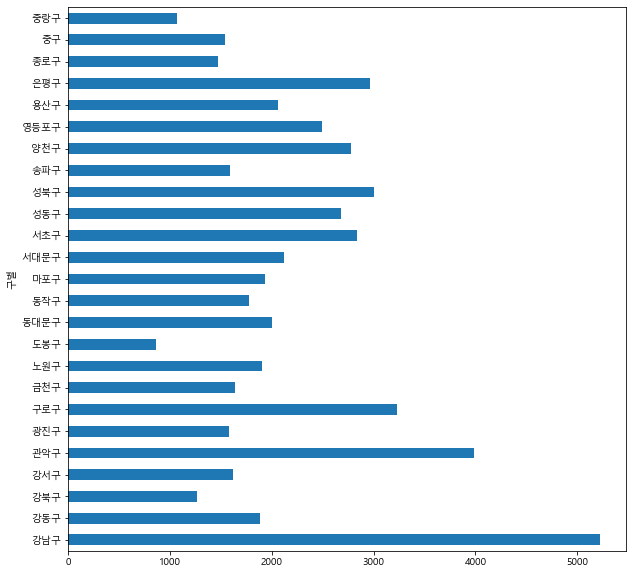

In [125]:
# 그래프를 그리기 위한 패키지
import matplotlib.pyplot as plt

# 그래프에서 한글 처리를 위한 패키지
from matplotlib import font_manager, rc
import platform

# 운영체제를 확인해서 글꼴 설정
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
    
# cctv 개수를 가지고 (가로)막대 그래프 그리기
df['소계'].plot(kind = 'barh', figsize = (10, 10))
plt.show()

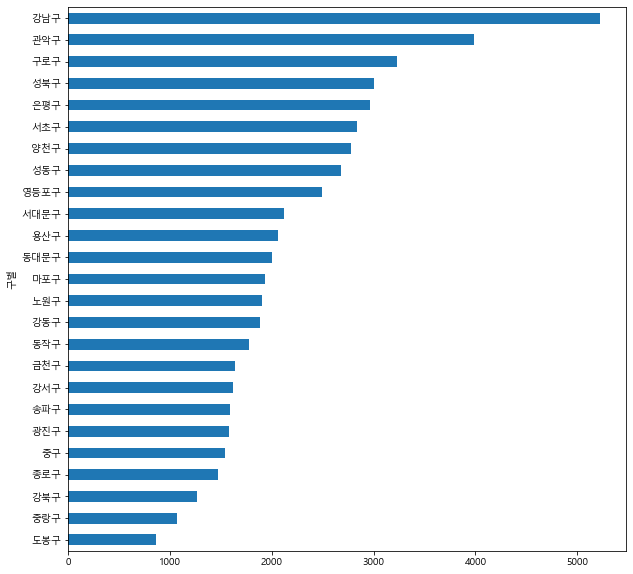

In [126]:
# cctv 개수를 가지고 (가로)막대 그래프 그리기 - 개수별 정렬
df['소계'].sort_values().plot(kind = 'barh', figsize = (10, 10))
plt.show()

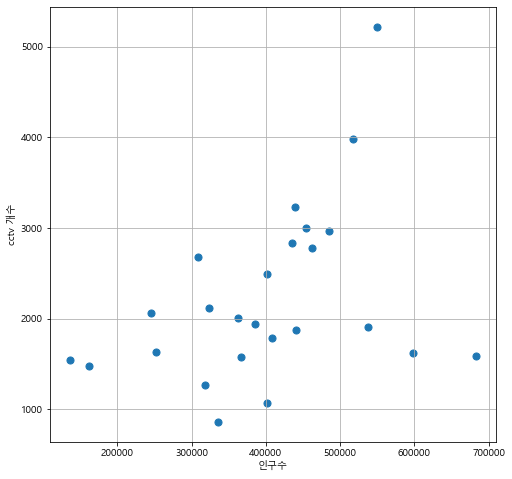

In [127]:
# 인구수(계)와 cctv 개수(소계)를 가지고 산포도 그리기
plt.figure(figsize = (8, 8))
plt.scatter(df['계'], df['소계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('cctv 개수')
plt.grid()
plt.show()

## 10. numpy의 polyfit이라는 함수를 이용해서 다항식을 구하여 선 그래프 그리기
### - 이 경우 다항식은 회귀식을 말함

In [155]:
# 계와 소계의 데이터를 가지고 다항식 구하기
import numpy as np
#fp1 = np.polyfit(df['계'], df['소계'], 1) # 1차 다항식
fp1 = np.polyfit(df['계'], df['소계'], 3) # 3차 다항식
f1 = np.poly1d(fp1)
print(f1)

            3            2
-1.155e-13 x + 1.33e-07 x - 0.04274 x + 5500


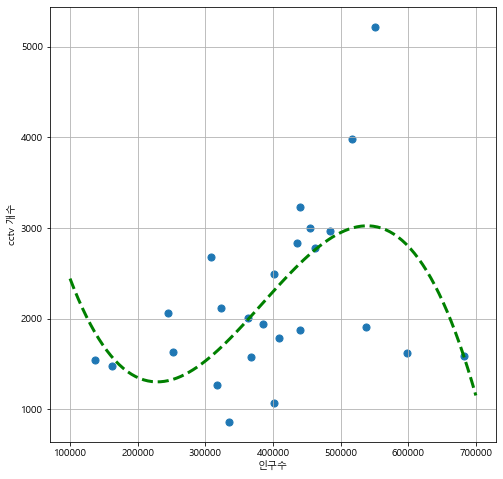

In [156]:
# 선 그래프 그리기
# 10만부터 70만까지 100 단위로 분할한 배열 생성
fx = np.linspace(100000, 700000, 100)
plt.figure(figsize = (8, 8))
plt.scatter(df['계'], df['소계'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g') # lw는 두께
plt.xlabel('인구수')
plt.ylabel('cctv 개수')
plt.grid()
plt.show()

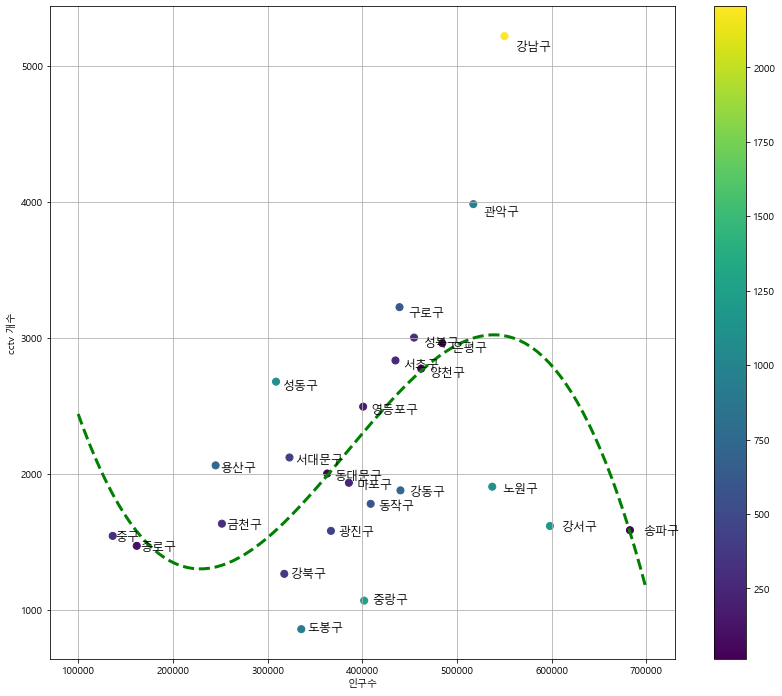

In [157]:
# 잔차를 색상으로 표시하고 지역 이름을 점 위에 출력
df['잔차'] = np.abs(df['소계'] - f1(df['계']))

plt.figure(figsize = (14, 12))
plt.scatter(df['계'], df['소계'], c = df['잔차'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g') # lw는 두께

# 그래프에 텍스트 출력하기
for n in range(25) :
    plt.text(df['계'][n] * 1.02, df['소계'][n] * 0.98  # x쪽 약간 오른쪽으로(1.02), y 글자를 약간아래로(0.98)
             , df.index[n]
             , fontsize = 12)

plt.xlabel('인구수')
plt.ylabel('cctv 개수')
plt.colorbar() # 잔차 색상 표시 두드러지도록
plt.grid()
plt.show()

# ** 데이터 구조화


## 1. stack 과 unstack
### - stack은 컬럼을 인덱스로 이동시켜 데이터를 길게 쌓는 것
### - unstack은 쌓은 것을 옆으로 늘어뜨리는 것

### - 읽어온 데이터의 구조가 원하는 구조가 아닐 때 구조화 메소드를 이용해서 원하는 구조로 만들어 데이터 분석

In [158]:
# stack과 unstack

# 멀티 인덱스 만들기
# 튜플의 list
mul_index = pd.MultiIndex.from_tuples([('cust_1', '2015'), ('cust_1', '2016')
                                       , ('cust_2', '2015'), ('cust_2', '2016')])

# 데이터 프레임 만들기
data = pd.DataFrame(data = np.arange(16).reshape(4, 4)
                    , index = mul_index
                    , columns = ['prd_1', 'prd_2', 'prd_3', 'prd_4'])
print(data)

             prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15


In [159]:
# 컬럼들을 인덱스로 설정. - stack
# 모든 열을 세로 방향으로 세워서 하나의 열로 만듦
# index는 1개의 level이 더 많아짐
data_stacked = data.stack()
print(data_stacked)

cust_1  2015  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2016  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2015  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2016  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int32


In [161]:
# unstack 은 데이터를 가로 방향으로 늘어뜨리는 것
# level 옵션을 이용해서 원하는 만큼만 열을 만들 수 있음
# 지금 같은 경우 index가 3가지이기 때문에 0, 1, 2 가능
print(data_stacked.unstack(level = 0)); print()
print(data_stacked.unstack(level = 2)); print()
print(data_stacked.unstack(level = 2).unstack(level = 1)); print()

            cust_1  cust_2
2015 prd_1       0       8
     prd_2       1       9
     prd_3       2      10
     prd_4       3      11
2016 prd_1       4      12
     prd_2       5      13
     prd_3       6      14
     prd_4       7      15

             prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15

       prd_1      prd_2      prd_3      prd_4     
        2015 2016  2015 2016  2015 2016  2015 2016
cust_1     0    4     1    5     2    6     3    7
cust_2     8   12     9   13    10   14    11   15



## 2. melt
### : 여러 개의 컬럼의 데이터를 합쳐서 하나의 컬럼으로 만드는 것
### - 데이터프레임과 id_vars 매개변수에 합치고자 하는 컬럼 이름의 list를 대입하면 됨

In [164]:
# 2개의 컬럼을 합쳐서 1개로 만들기
# 남겨 두고자 하는 컬럼의 list를 id_vars에 대입하면
# 나머지 컬럼을 합쳐서 컬럼의 이름은 variable, 값은 value로 설정됨
print(data); print()
print(pd.melt(data, id_vars = ['prd_3', 'prd_4'])); print()
print(pd.melt(data, id_vars = ['prd_3']))

             prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15

   prd_3  prd_4 variable  value
0      2      3    prd_1      0
1      6      7    prd_1      4
2     10     11    prd_1      8
3     14     15    prd_1     12
4      2      3    prd_2      1
5      6      7    prd_2      5
6     10     11    prd_2      9
7     14     15    prd_2     13

    prd_3 variable  value
0       2    prd_1      0
1       6    prd_1      4
2      10    prd_1      8
3      14    prd_1     12
4       2    prd_2      1
5       6    prd_2      5
6      10    prd_2      9
7      14    prd_2     13
8       2    prd_4      3
9       6    prd_4      7
10     10    prd_4     11
11     14    prd_4     15


## 3.crosstab
### : 행과 열을 기준으로 빈도를 세어서 테이블을 만들어주는 함수
### - 교차분석 할 때 이용
#### > 도수분포표(frequency table)를 만들어주는 기능

### - 함수에 행 이름과 열 이름을 설정
### - 머신러닝 결과 등을 나타낼 때 자주 이용

#### * 테스트 - 실제 TT(참참) TF(참거짓) FT(거짓참) FF(거짓거짓)

In [167]:
# 도수분포표 - crosstab
data = pd.DataFrame({'id' : ['id1', 'id1', 'id1', 'id2', 'id2', 'id2']
                     , 'fac_1' : ['a', 'a', 'a', 'b', 'b', 'b']
                     , 'fac_2': ['c', 'c', 'c', 'c', 'd', 'd']})

print(pd.crosstab(data['fac_1'], data['fac_2']))

# 비율로 출력하기
print(pd.crosstab(data['fac_1'], data['fac_2'], normalize = True))
# 테스트-실제 에서 T-T + F-F = 정확도 구할 때 이용
# T-T / T-T + T-F = 재현도, 재현율

fac_2  c  d
fac_1      
a      3  0
b      1  2
fac_2         c         d
fac_1                    
a      0.500000  0.000000
b      0.166667  0.333333
